In [186]:
import pandas as pd
import numpy as np

from sklearn.metrics import r2_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import lightgbm as lgb

import matplotlib.pyplot as plt

#### Read processed data

In [2]:
dftrain = pd.read_csv('../data/cleaned_train.csv')
dftest = pd.read_csv('../data/cleaned_test.csv')

#### Data standarization

In [14]:
dftrain.head()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,38000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,600000.0,0.0,0,0.0,0,0,0,0,0,2200000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,10000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,2000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,14400000.0,0.0,0,0.0,0,0,0,0,0,2000000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [23]:
target = np.log1p(dftrain['target'])

In [161]:
data_scaled = StandardScaler().fit_transform(dftrain.drop('target', axis = 1))

In [163]:
data_scaled.shape

(4459, 4730)

In [164]:
pca_train = PCA(n_components = 2000)
train_reduced = pca_train.fit_transform(data_scaled)

In [165]:
var = pca_train.explained_variance_ratio_
np.shape(pca_train.explained_variance_ratio_)

(2000,)

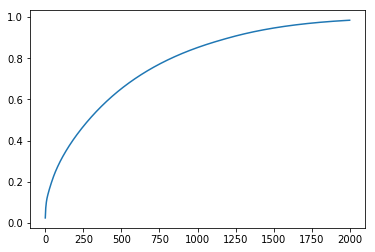

In [166]:
plt.plot(np.cumsum(var[var > 0.0]))
plt.show()

In [167]:
trainx, valx, trainy, valy = train_test_split(train_reduced, target,
                                            test_size = 0.15, random_state = 2018, shuffle = True)

#### RMSLE metric

In [176]:
def rmsle(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    return np.sqrt(np.mean(np.power(np.log(y_pred + 1) - np.log(y_true + 1), 2)))

#### Random forest Model

In [194]:
from sklearn.ensemble import RandomForestRegressor

rfparams = {'n_estimators': [10, 20, 30, 40],
            'max_depth': [7, 20, 40, 60]
           }

rfmodel = RandomForestRegressor()
grid_cv = GridSearchCV(rfmodel, rfparams, scoring = 'neg_mean_squared_log_error', n_jobs = -1, cv = 5, verbose=1)

In [195]:
grid_cv.fit(train_reduced, target)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 65.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 20, 30, 40], 'max_depth': [7, 20, 40, 60]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_log_error', verbose=1)

In [198]:
grid_cv.cv_results_

/Users/sabber/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/sabber/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/sabber/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/sabber/anaconda3/lib/

{'mean_fit_time': array([ 47.74930468, 100.73118663, 165.74799385, 201.56190872,
         84.67699275, 166.04744568, 258.93918848, 336.99480047,
         83.92473783, 170.21267848, 243.80924549, 323.18763661,
         85.4521203 , 196.16479731, 264.15898013, 309.80727382]),
 'std_fit_time': array([ 0.37269545,  8.84540567,  7.39810471,  1.00618815,  1.50617498,
         2.18857306,  8.17994401,  4.99487915,  3.36736551,  2.55327549,
         5.24393383, 11.0476814 ,  3.07922825, 13.66260323, 15.248465  ,
        29.77780214]),
 'mean_score_time': array([0.01310024, 0.0165204 , 0.01554995, 0.02300048, 0.01657438,
        0.01886177, 0.03392491, 0.04475908, 0.013972  , 0.02276931,
        0.02749124, 0.03558855, 0.0143065 , 0.03990479, 0.02673392,
        0.03296657]),
 'std_score_time': array([0.00156254, 0.00544465, 0.00066033, 0.0062061 , 0.00629803,
        0.00152519, 0.00580624, 0.00602474, 0.00234477, 0.00482882,
        0.00184792, 0.00556804, 0.00287424, 0.00879977, 0.0007631 ,


In [199]:
predval = grid_cv.predict(train_reduced)
rmsle(target, predval)

0.04143738425034252

In [378]:
imp_features = pd.DataFrame(np.column_stack(
                            [list(dftrain_final.columns), list(rfmodel.feature_importances_)]), 
                            columns = ['feature', 'importance'])

In [379]:
imp_features.importance = imp_features.importance.astype(float)

In [380]:
imp_features.sort_values('importance', ascending= False).head(10)

,feature,importance
881,f190486d6,0.101340
742,eeb9cd3aa,0.037169
509,58e2e02e6,0.034751
858,15ace8c9f,0.028317
564,9fd594eec,0.020217
762,58232a6fb,0.014465
0,20aa07010,0.013499
794,d6bb78916,0.010450
294,024c577b9,0.009687
167,6eef030c1,0.009442


In [183]:
# plt.plot(list(imp_features.sort_values('importance', ascending= False).head(100)['importance']))
# plt.show()

In [281]:
pd.merge(dftrain.f190486d6.describe().to_frame('train').reset_index(),
         dftest.f190486d6.describe().to_frame('test').reset_index(),
         on = 'index',
         how = 'outer')

,index,train,test
0,count,4.459000e+03,4.934200e+04
1,mean,2.565014e+06,1.460995e+06
2,std,8.906709e+06,6.730017e+06
3,min,0.000000e+00,0.000000e+00
4,25%,0.000000e+00,0.000000e+00
5,50%,0.000000e+00,0.000000e+00
6,75%,7.165000e+05,0.000000e+00
7,max,3.196120e+08,2.000000e+08


In [382]:
non_important_features = imp_features[imp_features.importance == 0.0]['feature'].tolist()

In [347]:
dftrain_final = dftrain.drop(non_important_features, axis =1)

In [348]:
dftest_final = dftest.drop(non_important_features, axis =1)

In [350]:
print(dftrain_final.shape, dftest_final.shape)

(4459, 1031) (49342, 1031)


#### Single lightGBM model

In [209]:
trainx, valx, trainy, valy = train_test_split(train_reduced, target,
                                            test_size = 0.25, random_state = 2018, shuffle = True)

In [220]:
params = {
    "objective" : "regression",
    "metric" : "rmse",
    "num_leaves" : 50,
    "max_depth": 7, 
#     "min_data_in_leaf" : 10,
#     'min_child_weight': 10
    "bagging_fraction" : 0.6,
    "feature_fraction" : 0.6,
    "bagging_frequency" : 6,
    "verbosity" : -1,
    "seed": 42
}

lgtrain = lgb.Dataset(trainx, label = trainy)
lgval = lgb.Dataset(valx, label = valy)

evals_result = {}

In [221]:
model = lgb.train(params, lgtrain, num_boost_round = 1800, 
                  valid_sets=[lgtrain, lgval], 
#                   early_stopping_rounds = 200, 
                  verbose_eval = 150, 
                  evals_result = evals_result)

[150]	training's rmse: 0.103718	valid_1's rmse: 1.58322
[300]	training's rmse: 0.0126971	valid_1's rmse: 1.58296
[450]	training's rmse: 0.00458269	valid_1's rmse: 1.58278
[600]	training's rmse: 0.00204806	valid_1's rmse: 1.58278
[750]	training's rmse: 0.00100863	valid_1's rmse: 1.58278
[900]	training's rmse: 0.000496942	valid_1's rmse: 1.58277
[1050]	training's rmse: 0.000262857	valid_1's rmse: 1.58277
[1200]	training's rmse: 0.000147723	valid_1's rmse: 1.58277
[1350]	training's rmse: 8.38597e-05	valid_1's rmse: 1.58276
[1500]	training's rmse: 4.91978e-05	valid_1's rmse: 1.58276
[1650]	training's rmse: 2.90805e-05	valid_1's rmse: 1.58276
[1800]	training's rmse: 1.77551e-05	valid_1's rmse: 1.58276


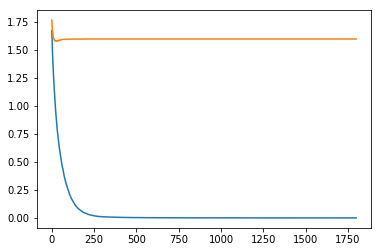

In [219]:
plt.plot(evals_result['training']['rmse'], label = 'Train')
plt.plot(evals_result['valid_1']['rmse'], label = 'Validation')
plt.show()

## Model building

#### Ensemble model

In [32]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

def r2score(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    return r2_score(y_true, y_pred)

def rmsle(y_true, y_pred):
    assert len(y_true) == len(y_pred)
    return np.sqrt(np.mean(np.power(np.log(y_pred + 1) - np.log(y_true + 1), 2)))

class Create_ensemble(object):
    def __init__(self, n_splits, base_models):
        self.n_splits = n_splits
        self.base_models = base_models

    def predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)

        folds = list(KFold(n_splits=self.n_splits, shuffle=True, random_state=2016).split(X, y))

        S_train = np.zeros((X.shape[0], len(self.base_models)))
        S_test = np.zeros((T.shape[0], len(self.base_models)))
        
        for i, clf in enumerate(self.base_models):
            S_test_i = np.zeros((T.shape[0], self.n_splits))

            for j, (train_idx, valid_idx) in enumerate(folds):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_valid = X[valid_idx]
                y_valid = y[valid_idx]
                clf.fit(X_train, y_train)
                valid_pred = clf.predict(X_valid)
                S_train[valid_idx, i] = valid_pred
                S_test_i[:, j] = clf.predict(T)
                
                print('Model: {}, fold: {}, rmsle: {}'.format(i, j, rmsle(y_valid, valid_pred)))
            print( "\nTraining RMSLE for model {} : {}".format(i, rmsle(y, S_train[:,i])))
            S_test[:, i] = S_test_i.mean(axis=1)
            
        return S_train, S_test

In [33]:
# LightGBM params# LightG 
lgb_params = {}
lgb_params['learning_rate'] = 0.75
lgb_params['n_estimators'] = 200
lgb_params['max_depth'] = 60
lgb_params['num_leaves'] = 50
lgb_params['n_jobs'] = 4
lgb_params['random_state'] = 2018

lgb_model = LGBMRegressor(**lgb_params)


In [34]:
ensemble = Create_ensemble(n_splits = 5, base_models = [lgb_model])
X = xtrain
Y = ytrain
T = dftest
train_pred, test_pred = ensemble.predict(X, Y, T)

Model: 0, fold: 0, rmsle: 0.12273527151630555
Model: 0, fold: 1, rmsle: 0.12456017947925055
Model: 0, fold: 2, rmsle: 0.11953675734322776
Model: 0, fold: 3, rmsle: 0.12557818199822304
Model: 0, fold: 4, rmsle: 0.12193341555573399

Training RMSLE for model 0 : 0.12288703829034306


In [19]:
np.shape(test_pred)

(49342, 1)

In [25]:
print(np.expm1(test_pred[0:10]))
print(dftrain.target.values)

[[2729819.88132433]
 [1463360.32109127]
 [1075694.11119517]
 [4542144.50332641]
 [1933654.3661349 ]
 [1165704.14348746]
 [3109700.55891942]
 [2760395.83575539]
 [1813145.498976  ]
 [1001444.60337879]]
[38000000.   600000. 10000000. ...  2800000. 10000000. 20000000.]


In [22]:
length = 20

pd.DataFrame(np.column_stack(
                        [np.expm1(test_pred[0:length]), 
                         np.expm1(train_pred[0:length]), 
                         np.absolute(np.expm1(test_pred[0:length]) - np.expm1(train_pred[0:length]))], 
             columns = ['predictions', 'validations', 'difference']))

TypeError: column_stack() got an unexpected keyword argument 'columns'

### Submission

In [26]:
sub = pd.read_csv('../data/sample_submission.csv')

In [27]:
sub["target"] = np.expm1(test_pred)

In [28]:
sub.to_csv('submission_with_ensembled.csv', index=False)